In [2]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import sklearn 

In [4]:
data = pd.read_csv('2014outagesJerry.csv')
Y = data['Total_outages']
Y1 = data['Equipment']
Y_train = np.array(Y)-np.array(Y1)
X = data[['Day_length_hr','Avg_Temp_F','Avg_humidity_percent','Avg_windspeed_mph','Max_windgust_mph',
         'Precipitation_in','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]
#X = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent',
#         'Min_humidity_percent','Avg_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph',
#         'Precipitation_in','Event_fog','Event_rain',Event_snow','Event_thunderstorm','Event_Hail']]
X_train = np.array(X)

In [5]:
from sknn.mlp import Regressor, Layer
nn = Regressor(
    layers=[
        Layer("Rectifier", units=20),
        Layer("Sigmoid", units=10),
        Layer("Linear")],
    learning_rate=0.001,
    n_iter=1000,
    batch_size = 10)
nn.fit(X_train, Y_train)

/Applications/anaconda/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Regressor(batch_size=10, callback=None, debug=False, dropout_rate=None,
     f_stable=0.001,
     hidden0=<sknn.nn.Layer `Rectifier`: units=20, name='hidden0', frozen=False>,
     hidden1=<sknn.nn.Layer `Sigmoid`: units=10, name='hidden1', frozen=False>,
     layers=[<sknn.nn.Layer `Rectifier`: units=20, name='hidden0', frozen=False>, <sknn.nn.Layer `Sigmoid`: units=10, name='hidden1', frozen=False>, <sknn.nn.Layer `Linear`: units=1, name='output', frozen=False>],
     learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
     loss_type=None, n_iter=1000, n_stable=10, normalize=None,
     output=<sknn.nn.Layer `Linear`: units=1, name='output', frozen=False>,
     parameters=None, random_state=None, regularize=None, valid_set=None,
     valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [6]:
Y_pred = nn.predict(X_train)
print(1/300*LA.norm(Y_pred-Y_train,2))
print(np.mean(Y_train))

2.93808265593
0.961643835616


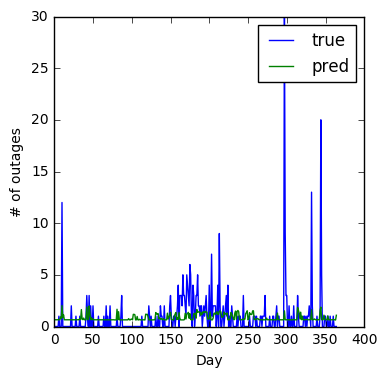

In [7]:
plt.figure(figsize=(4,4))
plt.plot(Y_train,label='true')
plt.plot(Y_pred,label='pred')
#plt.plot([0,50],[0,50],lw=4,color='black')
plt.ylabel('# of outages')
plt.xlabel('Day')
plt.legend()
plt.show()